# Assignment 1

## Machine Learning 2

**Utkarsh Thusoo**  
**M20AIE318**

**Q1. Programming**  
**(i) Download any CNN model trained on the ImageNet classification dataset.**  
**(ii) Download the PASCAL VOC 2012 dataset from the following link:**   
http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html  
**(iii) Use the features extracted from the last fully-connected layer (just before the prediction layer) of the CNN model to train binary one-vs.-rest SVM classifiers using the training data of the PASCAL dataset (you can use any standard library), and evaluate the classification accuracy for all the 20 classes on the validation set. Also provide the confusion matrix.**  
**(iv) Submit all the codes along with a write-up (PDF) containing all the analyses and relevant details.**

In [1]:
# Imports for the working model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model

from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
import numpy as np
import sys
import os
import glob
from pathlib import Path
from xml.etree import ElementTree

In [2]:
# Basic print functions
def printValues(header, values):
    
    if isinstance(values, np.ndarray):
        print('\033[1m%s: \033[0m' % (header))
        
        for each in range(0, len(values)):
            if isinstance(values[each], np.float64):
                print("Class %d: %f" % (each, values[each]))
            elif isinstance(values[each], np.int64):  
                print("Class %d: %d" % (each, values[each]))
    else:
        print('\033[1m%s: \033[0m %s' % (header, values))


def printValues1(header, val1, val2):
    
    if isinstance(val1, list):
        print('\033[1m%s: \033[0m' % (header))
        
        for each in range(0, len(val1)):
            print("Class %s: %d" % (val2[each], val1[each]))
    else:
        print('\033[1m%s: \033[0m %s' % (header, val1))

In [3]:
# Setting dimensions for the image
img_dim_x = 224
img_dim_y = 224
img_rgb = 3
img_dim = [img_dim_x, img_dim_y]
img_folder = '/Users/utkarsh/Desktop/study/iitj/sem2/ml2/assignment/VOCdevkit/VOC2012/'

In [4]:
# Read image for the directory
img_dir = os.path.join(img_folder ,'JPEGImages1/')
ext = ['png', 'jpg', 'gif']
img_files = []
[img_files.extend(glob.glob(img_dir + '*.' + e)) for e in ext]
img_files

['/Users/utkarsh/Desktop/study/iitj/sem2/ml2/assignment/VOCdevkit/VOC2012/JPEGImages1/2007_000904.jpg',
 '/Users/utkarsh/Desktop/study/iitj/sem2/ml2/assignment/VOCdevkit/VOC2012/JPEGImages1/2007_002120.jpg',
 '/Users/utkarsh/Desktop/study/iitj/sem2/ml2/assignment/VOCdevkit/VOC2012/JPEGImages1/2007_004948.jpg',
 '/Users/utkarsh/Desktop/study/iitj/sem2/ml2/assignment/VOCdevkit/VOC2012/JPEGImages1/2007_003000.jpg',
 '/Users/utkarsh/Desktop/study/iitj/sem2/ml2/assignment/VOCdevkit/VOC2012/JPEGImages1/2007_004009.jpg',
 '/Users/utkarsh/Desktop/study/iitj/sem2/ml2/assignment/VOCdevkit/VOC2012/JPEGImages1/2007_002281.jpg',
 '/Users/utkarsh/Desktop/study/iitj/sem2/ml2/assignment/VOCdevkit/VOC2012/JPEGImages1/2007_001763.jpg',
 '/Users/utkarsh/Desktop/study/iitj/sem2/ml2/assignment/VOCdevkit/VOC2012/JPEGImages1/2007_000333.jpg',
 '/Users/utkarsh/Desktop/study/iitj/sem2/ml2/assignment/VOCdevkit/VOC2012/JPEGImages1/2007_004627.jpg',
 '/Users/utkarsh/Desktop/study/iitj/sem2/ml2/assignment/VOCdevki

In [5]:
#Reading the xml file provided in the dataset
xml_files = []
for file in img_files:
    filename = Path(file).stem
    xml_dir = os.path.join(img_folder, 'Annotations/')
    xml_file = xml_dir + filename + ".xml"
    xml_files.append(xml_file)

In [6]:
# Created a dictionary with lists of images and xml path's
img_dict = {'img_path': img_files, 'xml_path': xml_files}

In [7]:
warnings.filterwarnings('ignore')

# define model
vgg19 = VGG19(weights='imagenet')
vgg19.summary()

# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

# Extracrting last leayer from the teh CNN model before the rediction layer
model = Model(inputs=vgg19.input, outputs=vgg19.get_layer('fc2').output)
temp_labels = []
temp_features = []

# useful for getting number of output classes
img_paths = img_dict['img_path']
xml_paths = img_dict['xml_path']

for index in range(0, len(img_paths)):
    img = image.load_img(img_paths[index], target_size=(img_dim_x, img_dim_y))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    # Extracting features
    block_pool_features = model.predict(x)
    flat_pool_features = block_pool_features.flatten()
    temp_features.append(flat_pool_features)
    objects = ElementTree.parse(xml_paths[index]).getroot().findall('.//object')
    label = []
    # Extracting labels from the image given the xml file
    [label.append(each.find('name').text) for each in objects]
    temp_labels.append(list(dict.fromkeys(label)))

features = []
labels = []

# Each image can have multiple labels assigned to it. Assigning identical labels to the new features.
for index in range(0,len(temp_labels)):
    if len(temp_labels[index]) > 1:
        for each in temp_labels[index]:
            features.append(temp_features[index])
            labels.append(each)
    else:
        features.append(temp_features[index])
        labels.append(temp_labels[index][0])
    

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
printValues("Feature Count", len(features[0]))
printValues("Label Count" , len(labels))
printValues("Unique Labels", list(dict.fromkeys(labels)))

Feature Count:  4096
Label Count:  794
Unique Labels:  ['cow', 'person', 'horse', 'bird', 'pottedplant', 'aeroplane', 'car', 'cat', 'dog', 'sofa', 'tvmonitor', 'train', 'motorbike', 'boat', 'diningtable', 'bus', 'bottle', 'sheep', 'bicycle', 'chair']


In [9]:
# Using Label encoder
le_labels = LabelEncoder().fit_transform(labels)

# get the shape of training labels
printValues1("Encoded labels: ", list(dict.fromkeys(le_labels)), list(dict.fromkeys(labels)))
printValues("Features shape: ", np.array(features).shape)
printValues("Encoded labels shape: ", le_labels.shape)

Encoded labels: : 
Class cow: 9
Class person: 14
Class horse: 12
Class bird: 2
Class pottedplant: 15
Class aeroplane: 0
Class car: 6
Class cat: 7
Class dog: 11
Class sofa: 17
Class tvmonitor: 19
Class train: 18
Class motorbike: 13
Class boat: 3
Class diningtable: 10
Class bus: 5
Class bottle: 4
Class sheep: 16
Class bicycle: 1
Class chair: 8
Features shape: :  (794, 4096)
Encoded labels shape: :  (794,)


In [10]:
(X_train, X_test, y_train, y_test) = train_test_split(np.array(features),
                                                      np.array(le_labels),
                                                      test_size=0.3,
                                                      random_state=100)
printValues("Training Data:", X_train.shape)
printValues("Test Data", X_test.shape)
printValues("Training Labels :", y_train.shape)
printValues("Test Labels : ",y_test.shape)

Training Data::  (555, 4096)
Test Data:  (239, 4096)
Training Labels ::  (555,)
Test Labels : :  (239,)


Test Set Accuracy : :  0.36401673640167365
Classification Report : :                precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.00      0.00      0.00         8
           2       1.00      0.71      0.83         7
           3       0.50      0.56      0.53         9
           4       0.00      0.00      0.00         7
           5       0.25      0.14      0.18         7
           6       0.09      0.17      0.12         6
           7       0.58      0.44      0.50        16
           8       0.12      0.08      0.10        12
           9       0.50      0.20      0.29         5
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         8
          13       0.50      0.25      0.33         8
          14       0.38      0.53      0.44        68
          15       0.75      0.33      0.46         9
          1

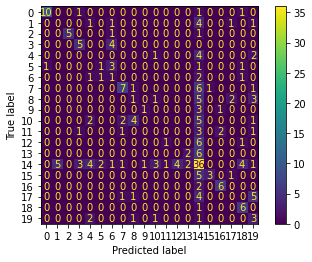

In [11]:
# Creating the SVC model
model = OneVsRestClassifier(SVC())

# Fitting the model with training data
model.fit(X_train, y_train)

# Making a prediction on the test set
prediction = model.predict(X_test)

# Evaluating the model
printValues("Test Set Accuracy : ", accuracy_score(y_test, prediction))
printValues("Classification Report : ", classification_report(y_test, prediction))
print('\033[1m' + 'Confusion Matrix:' + '\033[0m')
plot_confusion_matrix(model, X_test, y_test)  

Test Set Accuracy : :  0.3723849372384937
Classification Report : :                precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.00      0.00      0.00         8
           2       1.00      0.71      0.83         7
           3       0.55      0.67      0.60         9
           4       0.10      0.14      0.12         7
           5       0.30      0.43      0.35         7
           6       0.15      0.33      0.21         6
           7       0.60      0.56      0.58        16
           8       0.08      0.08      0.08        12
           9       0.50      0.20      0.29         5
          10       0.00      0.00      0.00        14
          11       0.20      0.12      0.15         8
          12       0.00      0.00      0.00         8
          13       0.33      0.25      0.29         8
          14       0.39      0.50      0.44        68
          15       0.60      0.33      0.43         9
          16

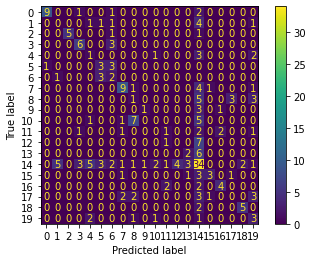

In [12]:
# Creating the LogisticRegression model
model = OneVsRestClassifier(LogisticRegression())

# Fitting the model with training data
model.fit(X_train, y_train)

# Making a prediction on the test set
prediction = model.predict(X_test)

# Evaluating the model
printValues("Test Set Accuracy : ", accuracy_score(y_test, prediction))
printValues("Classification Report : ", classification_report(y_test, prediction))
print('\033[1m' + 'Confusion Matrix:' + '\033[0m')
plot_confusion_matrix(model, X_test, y_test)  

## Analysis and Details

The classification has been run on VCOS Data with more than 500 images used. Before the last layer the features are extracted and then passed to OneVsRestClassifier. Models used are LogisticRegression and SVC for predicting the images. All 20 classes have been identified and confusion matrix for each of them is attached. At the end we have found accuracy as below:

1. **SVC** : 36.4%
2. **LogisticRegression** : 37.2%